# HW5

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
Nspace = np.round(np.logspace(np.log10(5), np.log10(10000), 20))
Nspace_with_retries = np.repeat(Nspace[None], 50, axis=0)

## Free Recall

In [9]:
@np.vectorize
def random_walk(N):
    visited = np.zeros(int(N), dtype=bool)
    count = 0
    while True:
        random = np.random.randint(0, int(N))
        if visited[random]:
            return count
        count += 1
        visited[random] = True

In [35]:
loop_lengths = random_walk(Nspace_with_retries)
mean_lengths = np.mean(loop_lengths, axis=0)
theoretical_mean_lengths = np.sqrt(np.pi * Nspace / 2)

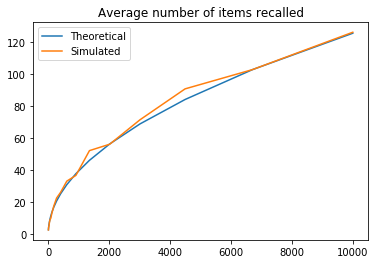

In [41]:
plt.figure()
plt.plot(Nspace, theoretical_mean_lengths, label='Theoretical')
plt.plot(Nspace, mean_lengths, label='Simulated')
plt.title("Average number of items recalled (linear scale)")
plt.legend()
plt.show()

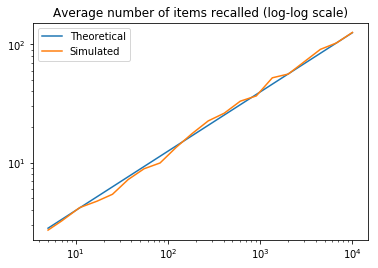

In [42]:
plt.figure()
plt.plot(Nspace, theoretical_mean_lengths, label='Theoretical')
plt.plot(Nspace, mean_lengths, label='Simulated')
plt.title("Average number of items recalled (log-log scale)")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

In [45]:
slope, intercept, *_ = linregress(np.log(Nspace), np.log(mean_lengths))

In [49]:
print(f"log(X(N)) = {intercept:.2f} + {slope:.2f} * log(N)")

log(X(N)) = 0.13 + 0.52 * log(N)


## Strong Associations

In [69]:
@np.vectorize
def random_walk_assoc(N):
    visited = np.zeros(int(N), dtype=bool)
    current = int(N/2)
    count = 0
    while not visited[current]:
        visited[current] = True
        count += 1
        offset = np.random.randint(-20, 21)
        current += offset
        if current < 0:
            current = 0
        if current >= N:
            current = int(N-1)
    return count

In [70]:
loop_lengths_assoc = random_walk_assoc(Nspace_with_retries)
mean_lengths_assoc = np.mean(loop_lengths_assoc, axis=0)

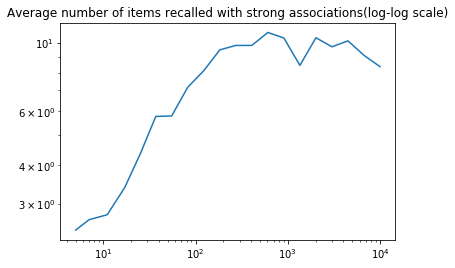

In [71]:
plt.figure()
plt.plot(Nspace, mean_lengths_assoc)
plt.title("Average number of items recalled with strong associations(log-log scale)")
plt.xscale('log')
plt.yscale('log')
plt.show()

In [72]:
slope_assoc, intercept_assoc, *_ = linregress(np.log(Nspace), np.log(mean_lengths_assoc))
print(f"log(X_assoc(N)) = {intercept_assoc:.2f} + {slope_assoc:.2f} * log(N)")

log(X_assoc(N)) = 0.92 + 0.18 * log(N)
